In [1]:
import numpy as np
import matplotlib.pyplot as plt

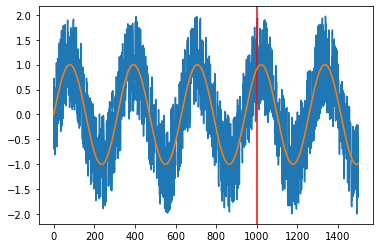

In [2]:
time = np.arange(0,1500)
y_with_noise = np.sin(0.02 * time) + np.random.uniform(low=-1, high=1, size=(1500,))
y = np.sin(0.02 * time)
plt.plot(y_with_noise)
plt.axvline(1000, c='r')
plt.plot(y)

In [3]:
y_train = y[0:1000]
y_test = y[1000:]

In [4]:
def prepareDataset(data, step):
    X = []
    y = []
    for i in range(len(data) - step):
        X.append(data[i: i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

In [5]:
step=10

In [6]:
trainX, trainY = prepareDataset(y_train, step)

In [7]:
testX, testY = prepareDataset(y_test, step)

In [8]:
print(trainX.shape, trainY.shape)

(990, 10) (990,)


In [9]:
print(testX.shape, testY.shape)

(490, 10) (490,)


In [10]:
trainX[0]

array([0.        , 0.01999867, 0.03998933, 0.05996401, 0.07991469,
       0.09983342, 0.11971221, 0.13954311, 0.15931821, 0.17902957])

In [11]:
trainY[0]

0.19866933079506122

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

In [16]:
model = Sequential()

In [17]:
model.add(
    SimpleRNN(units=1, activation='tanh')
)

In [18]:
model.add(
    Dense(units=1, activation='linear')
)

In [20]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',

In [21]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
model.fit(x=trainX, y=trainY, epochs=500)